In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

# from collections import defaultdict 
# import re, string 

# from gensim import corpora
# from gensim.models import LdaModel 
# import pyLDAvis.gensim
# import nltk
# from nltk.corpus import stopwords

# import spacy
# import en_core_web_sm
# spacy_parser = spacy.load('en_core_web_sm')

In [7]:
df = pd.read_csv('cops_cleaned (2).csv')

In [8]:
df.columns

Index(['court', 'status', 'display_publicly', 'first_name', 'middle_name',
       'last_name', 'suffix', 'news_links', 'news_headlines', 'crime_date',
       'filing_date', 'sentencing_date', 'charge1', 'charge1_desc', 'charge2',
       'charge2_desc', 'charge3', 'charge3_desc', 'charge4', 'charge4_desc',
       'charge5', 'charge5_desc', 'other_charges', 'currently_employed',
       'county', 'department_orig', 'department', 'start_date', 'end_date',
       'rank_orig', 'rank', 'conviction1', 'conviction2', 'conviction3',
       'conviction4', 'other_conviction', 'cii_number', 'case_number'],
      dtype='object')

In [11]:
df['crime_date'] = pd.to_datetime(df['crime_date'])
df['filing_date'] = pd.to_datetime(df['filing_date'])
df['sentencing_date'] = pd.to_datetime(df['sentencing_date'])

In [27]:
df.sort_values(by='crime_date',ascending=True, inplace=True)

In [29]:
df.reset_index()

,index,court,status,display_publicly,first_name,middle_name,last_name,suffix,news_links,news_headlines,crime_date,filing_date,sentencing_date,charge1,charge1_desc,charge2,charge2_desc,charge3,charge3_desc,charge4,charge4_desc,charge5,charge5_desc,other_charges,currently_employed,county,department_orig,department,start_date,end_date,rank_orig,rank,conviction1,conviction2,conviction3,conviction4,other_conviction,cii_number,case_number
0,19,NaN,y,True,Theodore,Ralph,Fernandes,Jr.,https://www.dailybulletin.com/2013/02/23/forme...,[Former Rialto police officer takes plea deal ...,2002-09-14,2012-05-07,2013-03-28,Felony: PC 288 (C)(1),LEWD & LASCIVIOUS ACT W/CHILD 14/15:DEFENDANT ...,Felony: PC 288 (C)(1),LEWD & LASCIVIOUS ACT W/CHILD 14/15:DEFENDANT ...,Felony: PC 288 (C)(1),LEWD & LASCIVIOUS ACT W/CHILD 14/15:DEFENDANT ...,Felony: PC 289 (A)(1)(A),SEXUAL PENETRATION W/FORCE/FEAR/ETC,Felony: PC 289 (a)(1)(A),SEXUAL PENETRATION W/FORCE/FEAR/ETC,Felony: PC 289 (i)\r\nFelony: PC 289 (i)\r\nFe...,No,San Bernardino,RIALTO PD,Rialto Police,3/13/1995,7/27/2012,PO,Police Officer,Felony: PC 289(A)(1)(A) - SEXUAL PENETRATION W...,Felony: PC 289(A)(1)(A) - SEXUAL PENETRATION W...,Felony: PC 288(C)(1) - L&L ACTS W/CHILD:AGE SP...,NaN,NaN,1.011005e+09,FWV1200985
1,289,NaN,y,True,Jared,Michael,Tomlinson,NaN,https://www.chicoer.com/2015/06/11/former-cop-...,[Former cop sentenced to 28 months for sex wit...,2003-08-04,2013-07-23,2015-06-11,Felony: PC 288 (A),LEWD OR LASCIVIOUS ACTS W/CHILD UNDER 14 YEARS,Felony: PC 288 A (B)(2),ORAL COPULATION OF A PERSON UNDER 16,PC 286 (B)(2),SODOMY W/PERSON UNDER 16 YEARS,Felony: PC 664/286 (B)(2),ATTEMPTED SODOMY OF PERSON UNDER 16,NaN,NaN,NaN,No,Yuba,MARYSVILLE PD,Marysville Police,5/10/2007,2/9/2015,RI24,Reserve Level 1 (24 hours),Felony: PC 286(B)(2) SODOMY W/PERSON UNDER 16 ...,Felony: PC 286(B)(2) SODOMY W/PERSON UNDER 16 ...,Felony: PC 288A(B)(2) ORAL COPULATION W/PERSON...,NaN,NaN,1.024264e+09,CM039126
2,536,NaN,y,True,Walter,Willis,McWilson,NaN,https://www.nbcsandiego.com/news/local/Dirty-C...,[Cop Headed to Jail](https://www.nbcsandiego.c...,2004-12-01,2009-11-10,2010-06-15,Felony: PC 182 (A)(4),CONSPIRACY TO CHEAT AND DEFRAUD ANOTHER OF PRO...,5 COUNTS: Felony: PC 496(A),RECEIVING AND CONCEALING STOLEN PROPERTY,6 COUNTS: Felony: PC 487(A),GRAND THEFT,2 Counts: Misdemeanor PC 496(A),STOLEN PROPERTY/PUBLIC SERVICE,NaN,NaN,NaN,No,San Diego,OCEANSIDE PD,Oceanside Police,6/27/1999,2/19/2010,SGT,Sergeant,Misdemeanor: PC 496(A) STOLEN PROPERTY PUBLIC ...,2 COUNTS:Felony: PC 496(A) RECEIVING STOLEN PR...,NaN,NaN,NaN,1.010497e+09,SCN269296
3,406,NaN,y,True,Jeffrey,Scott,Holzworth,NaN,https://sanfrancisco.cbslocal.com/2014/04/03/f...,[Former Santa Rosa Campus Cop Guilty Of Steali...,2005-01-01,2013-01-30,2014-05-29,Felony: PC 487 (A),GRAND THEFT:MONEY/LABOR/PROPERTY,Felony: PC 496 (A),RECEIVE/ETC KNOWN STOLEN PROPERTY,Felony: PC 496 (A),RECEIVE/ETC KNOWN STOLEN PROPERTY,Felony: PC 496 (A),RECEIVE/ETC KNOWN STOLEN PROPERTY,Felony: PC 496 (A),RECEIVE/ETC KNOWN STOLEN PROPERTY,"10 cts Felony: PC 496 (A), Felony: PC 32",No,Sonoma,SANTA ROSA JR COLLEGE PD,Santa Rosa Jr College Police,9/4/1984,12/31/2012,PO,Police Officer,Felony: 487(A) PC-GRAND THEFT:MONEY/LABOR/PROP,Felony: 496(A) PC-RECEIVE/ETC KNOWN STOLEN PRO...,NaN,NaN,NaN,1.027980e+09,SCR-627215-1
4,527,NaN,y,True,Michael,Patrick,Leary,NaN,http://www.egcitizen.com/news/leary-gets-house...,[Leary gets house arrest](http://www.egcitizen...,2006-01-27,2009-10-01,2010-11-02,Felony: PC 487 (A),GRAND THEFT:MONEY/LABOR/PROPERTY,Felony: PC 470 (C),ALTER/ETC WILL/ETC,Felony: PC 470 (D),FORGERY:FALSE CHECKS/RECORDS/CERTIFICATES/ETC.,Felony: PC 115 (A),OFFER/ETC FALSE/FORGED INSTRUMENT TO FILE,NaN,NaN,NaN,No,Sacramento,SACRAMENTO CO SD,Sacramento County Sheriff,6/10/1984,4/8/2010,LT,Lieutenant,Misdemeanor: PC 487(A) GRAND THEFT:MONEY/LABOR...,Misdemeanor: PC 664/487 (A) ATTEMPTED GRAND THEFT,Misdemeanor: PC 470 (D) FALSE CHECK/RECORD/CER...,NaN,NaN,1.007181e+09,09F07685

Were the crimes committed on certain dates more?

What crimes were the most abundant per county?

In [38]:
df.charge1_desc.unique()

array(['LEWD & LASCIVIOUS ACT W/CHILD 14/15:DEFENDANT 10 YRS OLDER',
       'LEWD OR LASCIVIOUS ACTS W/CHILD UNDER 14 YEARS',
       'CONSPIRACY TO CHEAT AND DEFRAUD ANOTHER OF PROPERTY',
       'GRAND THEFT:MONEY/LABOR/PROPERTY',
       'SODOMY BY FORCE/VIOLENCE/FEAR', 'ASK/RECEIVE BRIBE',
       'OBTAIN/ETC CONTROLLED SUBSTANCE BY FRAUD',
       'BATTERY AGAINST SPOUSE/ETC',
       'EMBEZZLEMENT OF PROPERTY BY OFFICER/DIRECTOR/ETC',
       'BATTERY WITH SERIOUS BODILY INJURY',
       'CONSPIRACY:OBSTRUCT JUSTICE/ETC',
       'INFLICT CORPORAL INJURY ON SPOUSE/COHABITANT/DATNG RELATNSHP',
       'INSURANCE FRAUD - FALSE CLAIM', "GET CREDIT/ETC OTHER'S ID",
       'VEHICLE MANSLAUGHTER W/O GROSS NEGLIGENCE',
       'EXHIBIT/DRAW FIREARM IN PRESENCE OF MOTOR VEHICLE OCCUPANT',
       'DUI CAUSING INJURY', 'ASSAULT W/DEADLY WEAPON:NOT F/ARM',
       'DUI ALCOHOL', 'GRAND THEFT BY EMPLOYEE OR AGENT',
       'EXHIBIT FIREARM IN PRESENCE OF PEACE OFFICER',
       'BATTERY:SPOUSE/EX SPOUSE/D

In [39]:
df.charge1_desc.nunique()

164

In [40]:
df.charge2_desc.nunique()

161

In [41]:
df.charge3_desc.nunique()

120

How much time passes between filing and conviction?

In [47]:
df['months_to_convict'] = (df['sentencing_date'] - df['filing_date']) / np.timedelta64(1, 'M')

In [50]:
df_time = df.sort_values(by=['months_to_convict'], ascending=False)

In [51]:
df_time

,court,status,display_publicly,first_name,middle_name,last_name,suffix,news_links,news_headlines,crime_date,filing_date,sentencing_date,charge1,charge1_desc,charge2,charge2_desc,charge3,charge3_desc,charge4,charge4_desc,charge5,charge5_desc,other_charges,currently_employed,county,department_orig,department,start_date,end_date,rank_orig,rank,conviction1,conviction2,conviction3,conviction4,other_conviction,cii_number,case_number,months_to_convict
268,NaN,y,True,Richard,Anthony,Soares,NaN,https://www.sfexaminer.com/news/sf-officer-acc...,[SF officer accused of violating protective or...,2012-01-07,2012-02-15,2019-05-17,Felony: PC 245 (a)(4),ASSAULT WITH FORCE LIKELY TO CAUSE GREAT BODIL...,Misdemeanor: PC 136.1 (A)(2),DISSUADING A WITNESS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,San Francisco,SAN FRANCISCO PD,San Francisco Police,4/25/2008,8/20/2015,PO,Police Officer,Misdemeanor: PC 166 (C)(1) - CONTEMPT:VIOL PRO...,Misdemeanor: PC 166 (C)(1) - CONTEMPT:VIOL PRO...,Misdemeanor: PC 166 (C)(1) - CONTEMPT:VIOL PRO...,Misdemeanor: PC 166 (C)(1) - CONTEMPT:VIOL PRO...,Misdemeanor: PC 166 (C)(1) - CONTEMPT:VIOL PRO...,1.023179e+09,13016011,86.999733
427,NaN,y,True,Enoch,Jeremiah,Clark,NaN,https://www.recordgazette.net/former-beaumont-...,[Former Beaumont police officer sentenced in p...,2012-02-21,2012-04-19,2018-08-31,Felony: PC 149,ASSAULT BY PUBLIC OFFICER,Felony: PC 244.5 (B),ASSAULT WITH STUN GUN OR LESS LETHAL WEAPON,Felony: PC 243 (D),BATTERY W/SERIOUS BODILY INJURY,Felony: PC 245 (A)(1),ASSAULT W/DEADLY WEAPON:NOT F/ARM,NaN,NaN,NaN,No,Riverside,BEAUMONT PD,Beaumont Police,8/31/2005,7/2/2012,NaN,NaN,Misdemeanor: 149 PC-ASSAULT BY PUBLIC OFFICER,NaN,NaN,NaN,NaN,1.025205e+09,RIF1202237,76.387605
494,NaN,y,True,Brian,Christopher,Hansen,NaN,https://www.sacbee.com/news/local/crime/articl...,[Former CHP officer pleads no contest to worke...,2008-11-14,2012-06-07,2017-08-29,Felony: IC 1871.4 (A)(1),MAKE/ETC FALSE/ETC WORKERS COMPENSATION INSURA...,Felony: PC 664/118 (A),ATTEMPTED PERJURY UNDER OATH,Felony: PC 664/118 (A),ATTEMPTED PERJURY UNDER OATH,NaN,NaN,NaN,NaN,"Felony: IC 1871.4 (A)(1),Felony: PC 550 (A)(1)",No,State of California,CA HIGHWAY PATROL,Calif. Highway Patrol,3/23/2007,1/5/2011,NaN,NaN,Felony: IC 1871.4(A)1 MAKE/ETC FALSE/ETC WORKE...,NaN,NaN,NaN,NaN,1.025467e+09,12F03825,62.719974
571,NaN,y,True,Paul,NaN,Makaveckas,NaN,https://www.sfgate.com/crime/article/Former-S-...,[Former S.F. cop gets 2 years for taxi-test br...,2007-03-01,2010-12-01,2015-09-18,Felony: PC 68,ASK/RECEIVE BRIBE,Felony: PC 68,ASK/RECEIVE BRIBE,Felony: PC 68,ASK/RECEIVE BRIBE,Felony: PC 68,ASK/RECEIVE BRIBE,NaN,NaN,NaN,No,San Francisco,SAN FRANCISCO PD,San Francisco Police,11/27/1972,3/10/2009,PO,Police Officer,Felony: 68 PC-ASK/RECEIVE BRIBE,Felony: 68 PC-ASK/RECEIVE BRIBE,NaN,NaN,NaN,1.003814e+09,10035391,57.561757
322,NaN,y,True,Manuel,Bernardo,Ortiz,NaN,https://losangeles.cbslocal.com/2014/04/09/lap...,[LAPD Officer Sentenced To Probation In 2008 P...,2007-07-06,2009-10-06,2014-04-09,Felony: PC 182 (A)(5),CONSPIRACY:OBSTRUCT JUSTICE/ETC,Felony: PC 118 (A),PERJURY,Felony: PC 118 (A),PERJURY UNDER OATH,Felony: PC 118 (A),PERJURY UNDER OATH,Felony: PC 118(a),PERJURY UNDER OATH,NaN,No,Los Angeles,LOS ANGELES PD,Los Angeles Police,6/4/2001,7/15/2014,PO,Police Officer,Felony: PC 182 (A)(5) - CONSPIRACY:OBSTRUCT JU...,Felony: PC 118(a) - PERJURY UNDER OATH,NaN,NaN,NaN,1.021322e+09,BA362872,54.079139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,San Diego,Clip Case,True,Karen,A,Almos,NaN,https://fox5sandiego.com/2014/04/08/sdpd-detec...,[SDPD detective gets probation for DUI](https:...,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,San Diego Police,San Diego,SAN DIEGO PD,San Diego Police,3/20/1998,NaN,PO,Police Officer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
626,San Diego,2013 clips,True,Jeffrey,NaN,Blackford,NaN,https://www.nbcsandiego.com/news/lo

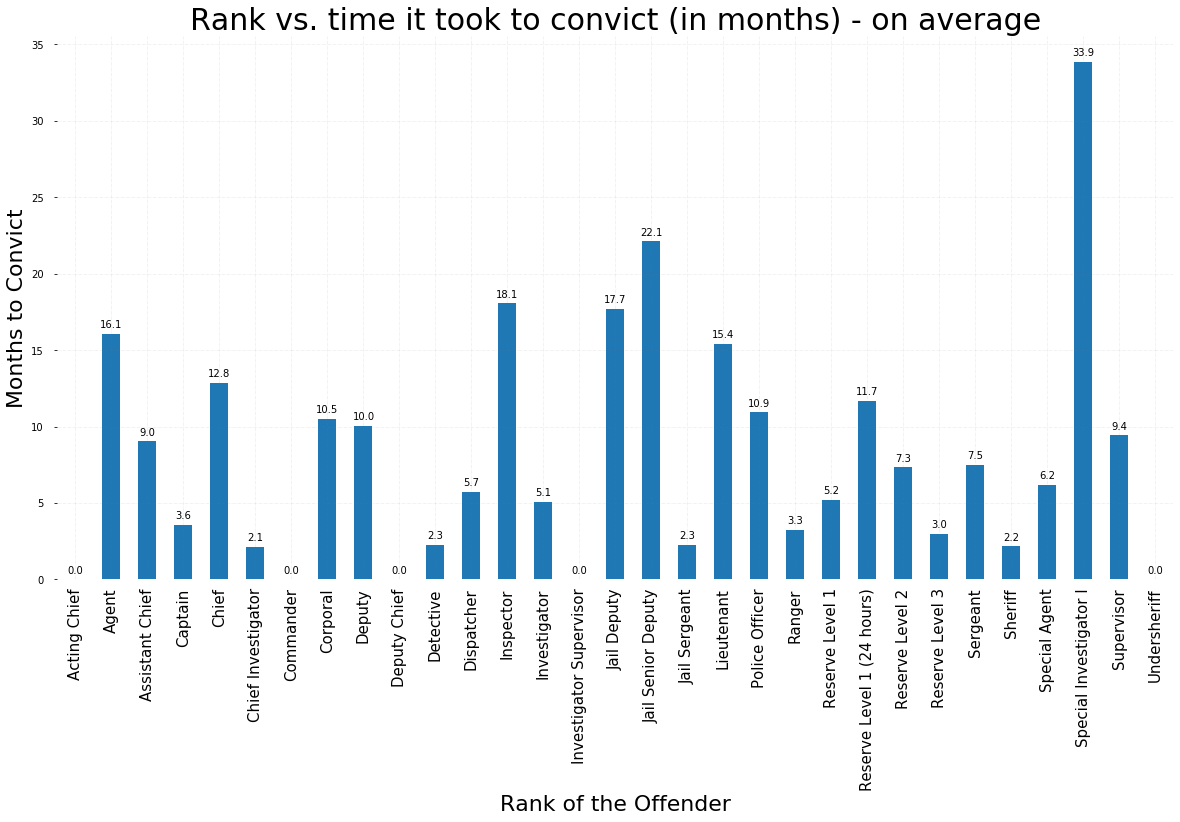

In [79]:
fig, ax = plt.subplots(figsize =(20, 10))

df_time_rank = df_time.groupby('rank')['months_to_convict'].mean()
df_time_rank.plot.bar()
ax.set_xlabel('Rank of the Offender', fontsize = 22)
ax.set_ylabel('Months to Convict', fontsize = 22)
ax.set_title('Rank vs. time it took to convict (in months) - on average', fontsize = 30)
ax.xaxis.set_ticks_position('none')
ax.xaxis.set_tick_params(pad = 5, labelsize = 15) 
ax.yaxis.set_tick_params(pad = 10) 
ax.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.2)
for i in ax.patches: 
    plt.annotate(format(i.get_height(), '.1f'), 
    (i.get_x() + i.get_width() / 2., i.get_height()), 
    ha = 'center', va = 'center', 
    xytext = (0, 9), 
    textcoords = 'offset points')

for s in ['top', 'bottom', 'left', 'right']: 
    ax.spines[s].set_visible(False);

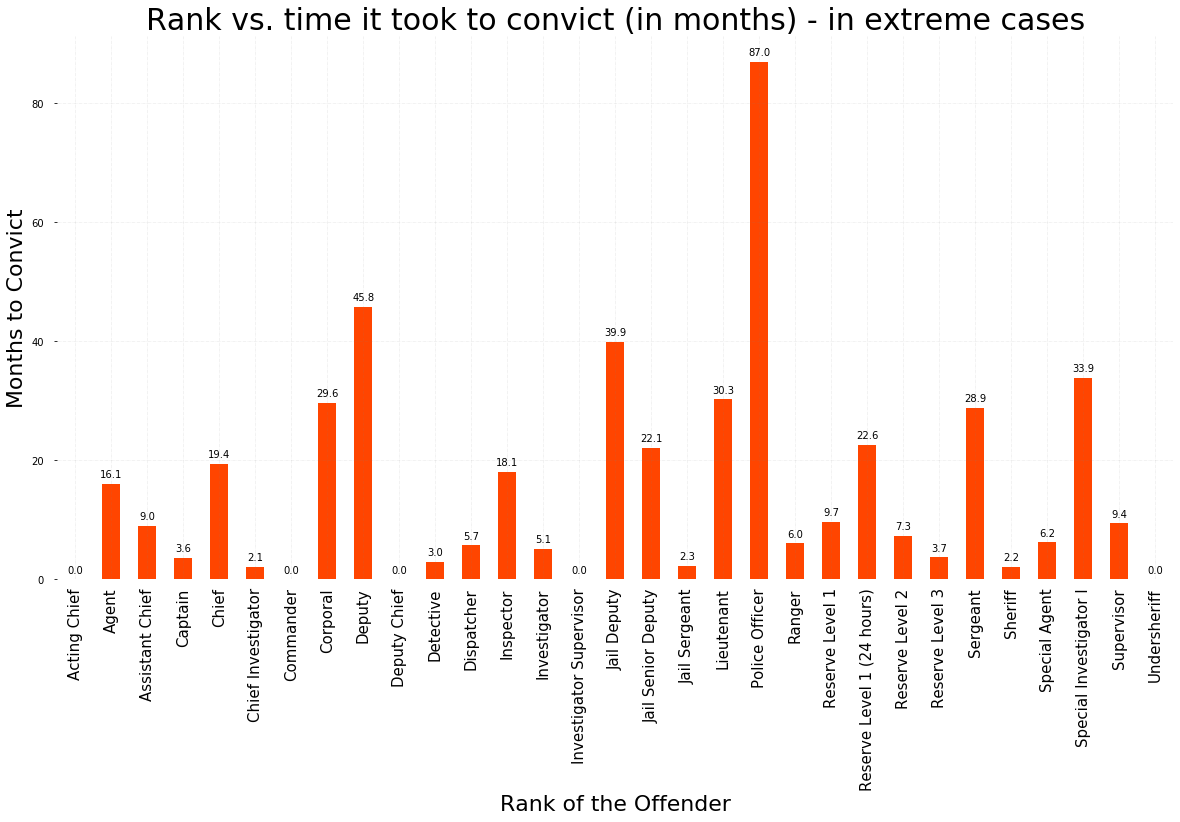

In [81]:
fig, ax = plt.subplots(figsize =(20, 10))

df_time_rank2 = df_time.groupby('rank')['months_to_convict'].max()
df_time_rank2.plot.bar(color = 'orangered')
ax.set_xlabel('Rank of the Offender', fontsize = 22)
ax.set_ylabel('Months to Convict', fontsize = 22)
ax.set_title('Rank vs. time it took to convict (in months) - in extreme cases', fontsize = 30)
ax.xaxis.set_ticks_position('none')
ax.xaxis.set_tick_params(pad = 5, labelsize = 15) 
ax.yaxis.set_tick_params(pad = 10) 
ax.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.2)
for i in ax.patches: 
    plt.annotate(format(i.get_height(), '.1f'), 
    (i.get_x() + i.get_width() / 2., i.get_height()), 
    ha = 'center', va = 'center', 
    xytext = (0, 9), 
    textcoords = 'offset points')

for s in ['top', 'bottom', 'left', 'right']: 
    ax.spines[s].set_visible(False);

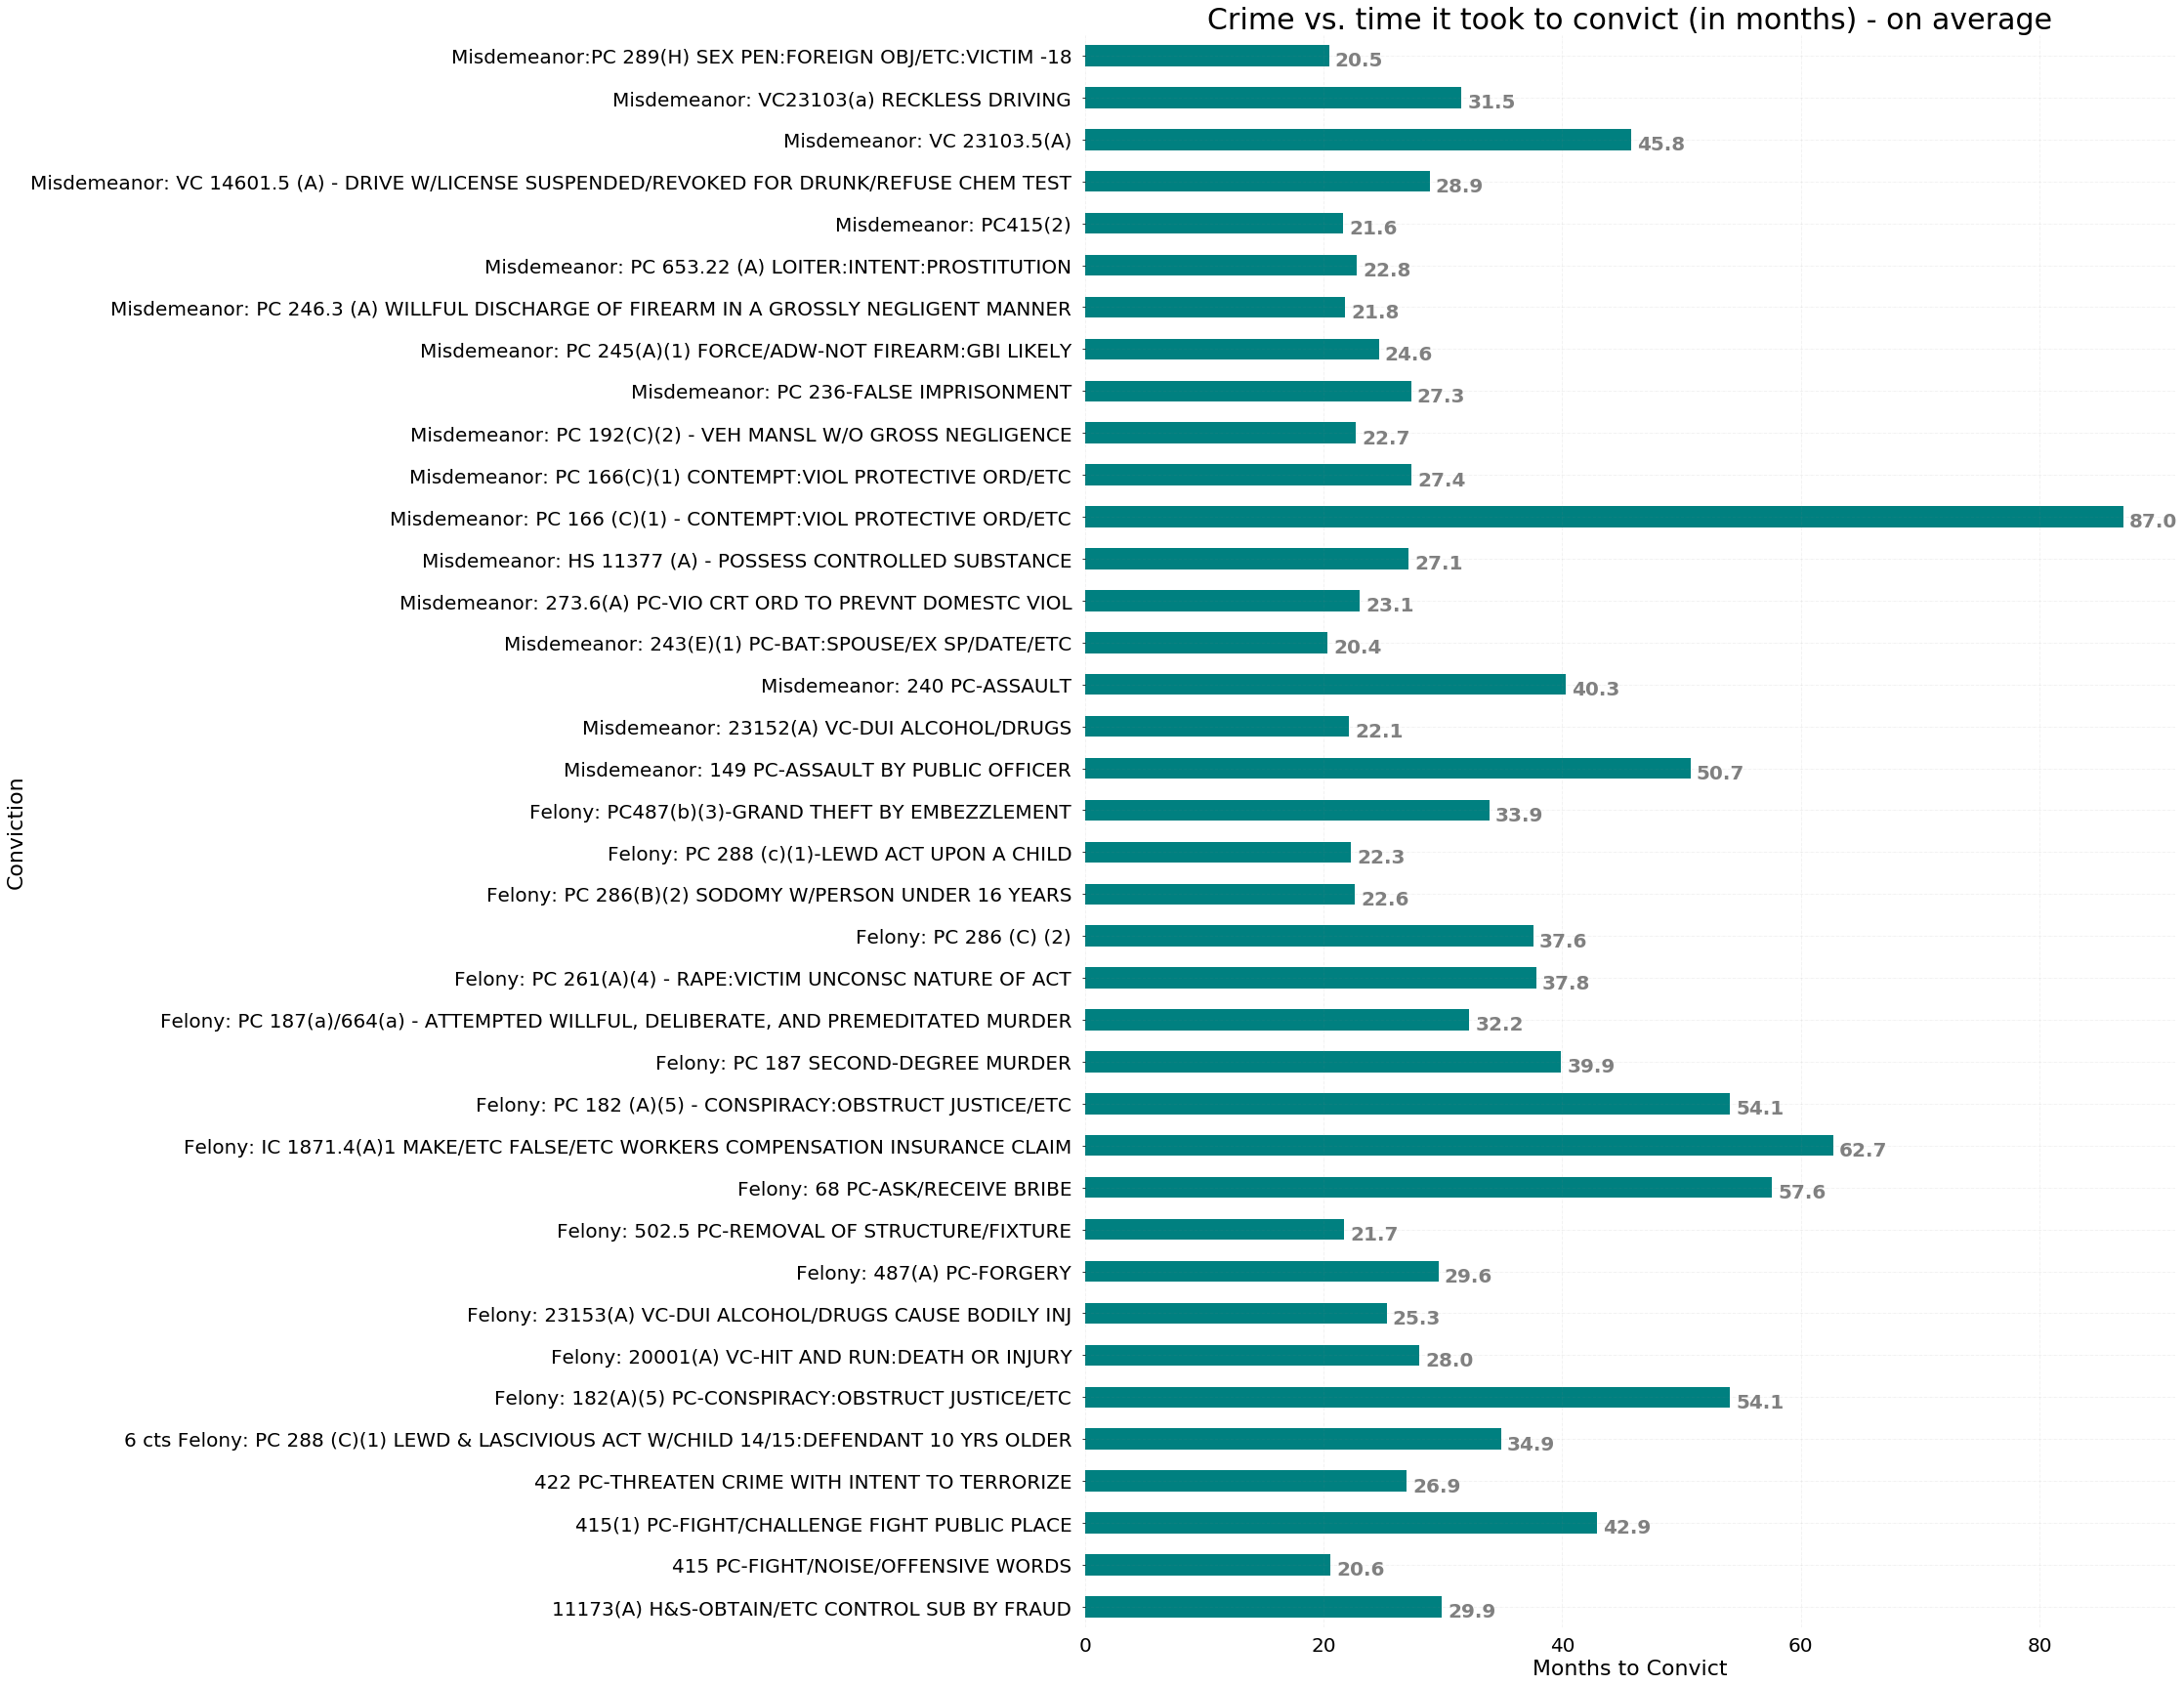

In [97]:
fig, ax = plt.subplots(figsize =(20, 30))

df_time_rank3 = df_time.groupby('conviction1')['months_to_convict'].mean()
df_time_rank3[df_time_rank3 > 20].plot.barh(color = 'teal')
ax.set_xlabel('Months to Convict', fontsize = 22)
ax.set_ylabel('Conviction', fontsize = 22)
ax.set_title('Crime vs. time it took to convict (in months) - on average', fontsize = 30)
ax.xaxis.set_ticks_position('none')
ax.xaxis.set_tick_params(pad = 5, labelsize = 20) 
ax.yaxis.set_tick_params(pad = 10, labelsize = 20) 
ax.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.2)
for i in ax.patches: 
    plt.text(i.get_width()+0.5, i.get_y(),  
             str(round((i.get_width()), 1)), 
             fontsize = 20, fontweight ='bold', 
             color ='grey') 

for s in ['top', 'bottom', 'left', 'right']: 
    ax.spines[s].set_visible(False);

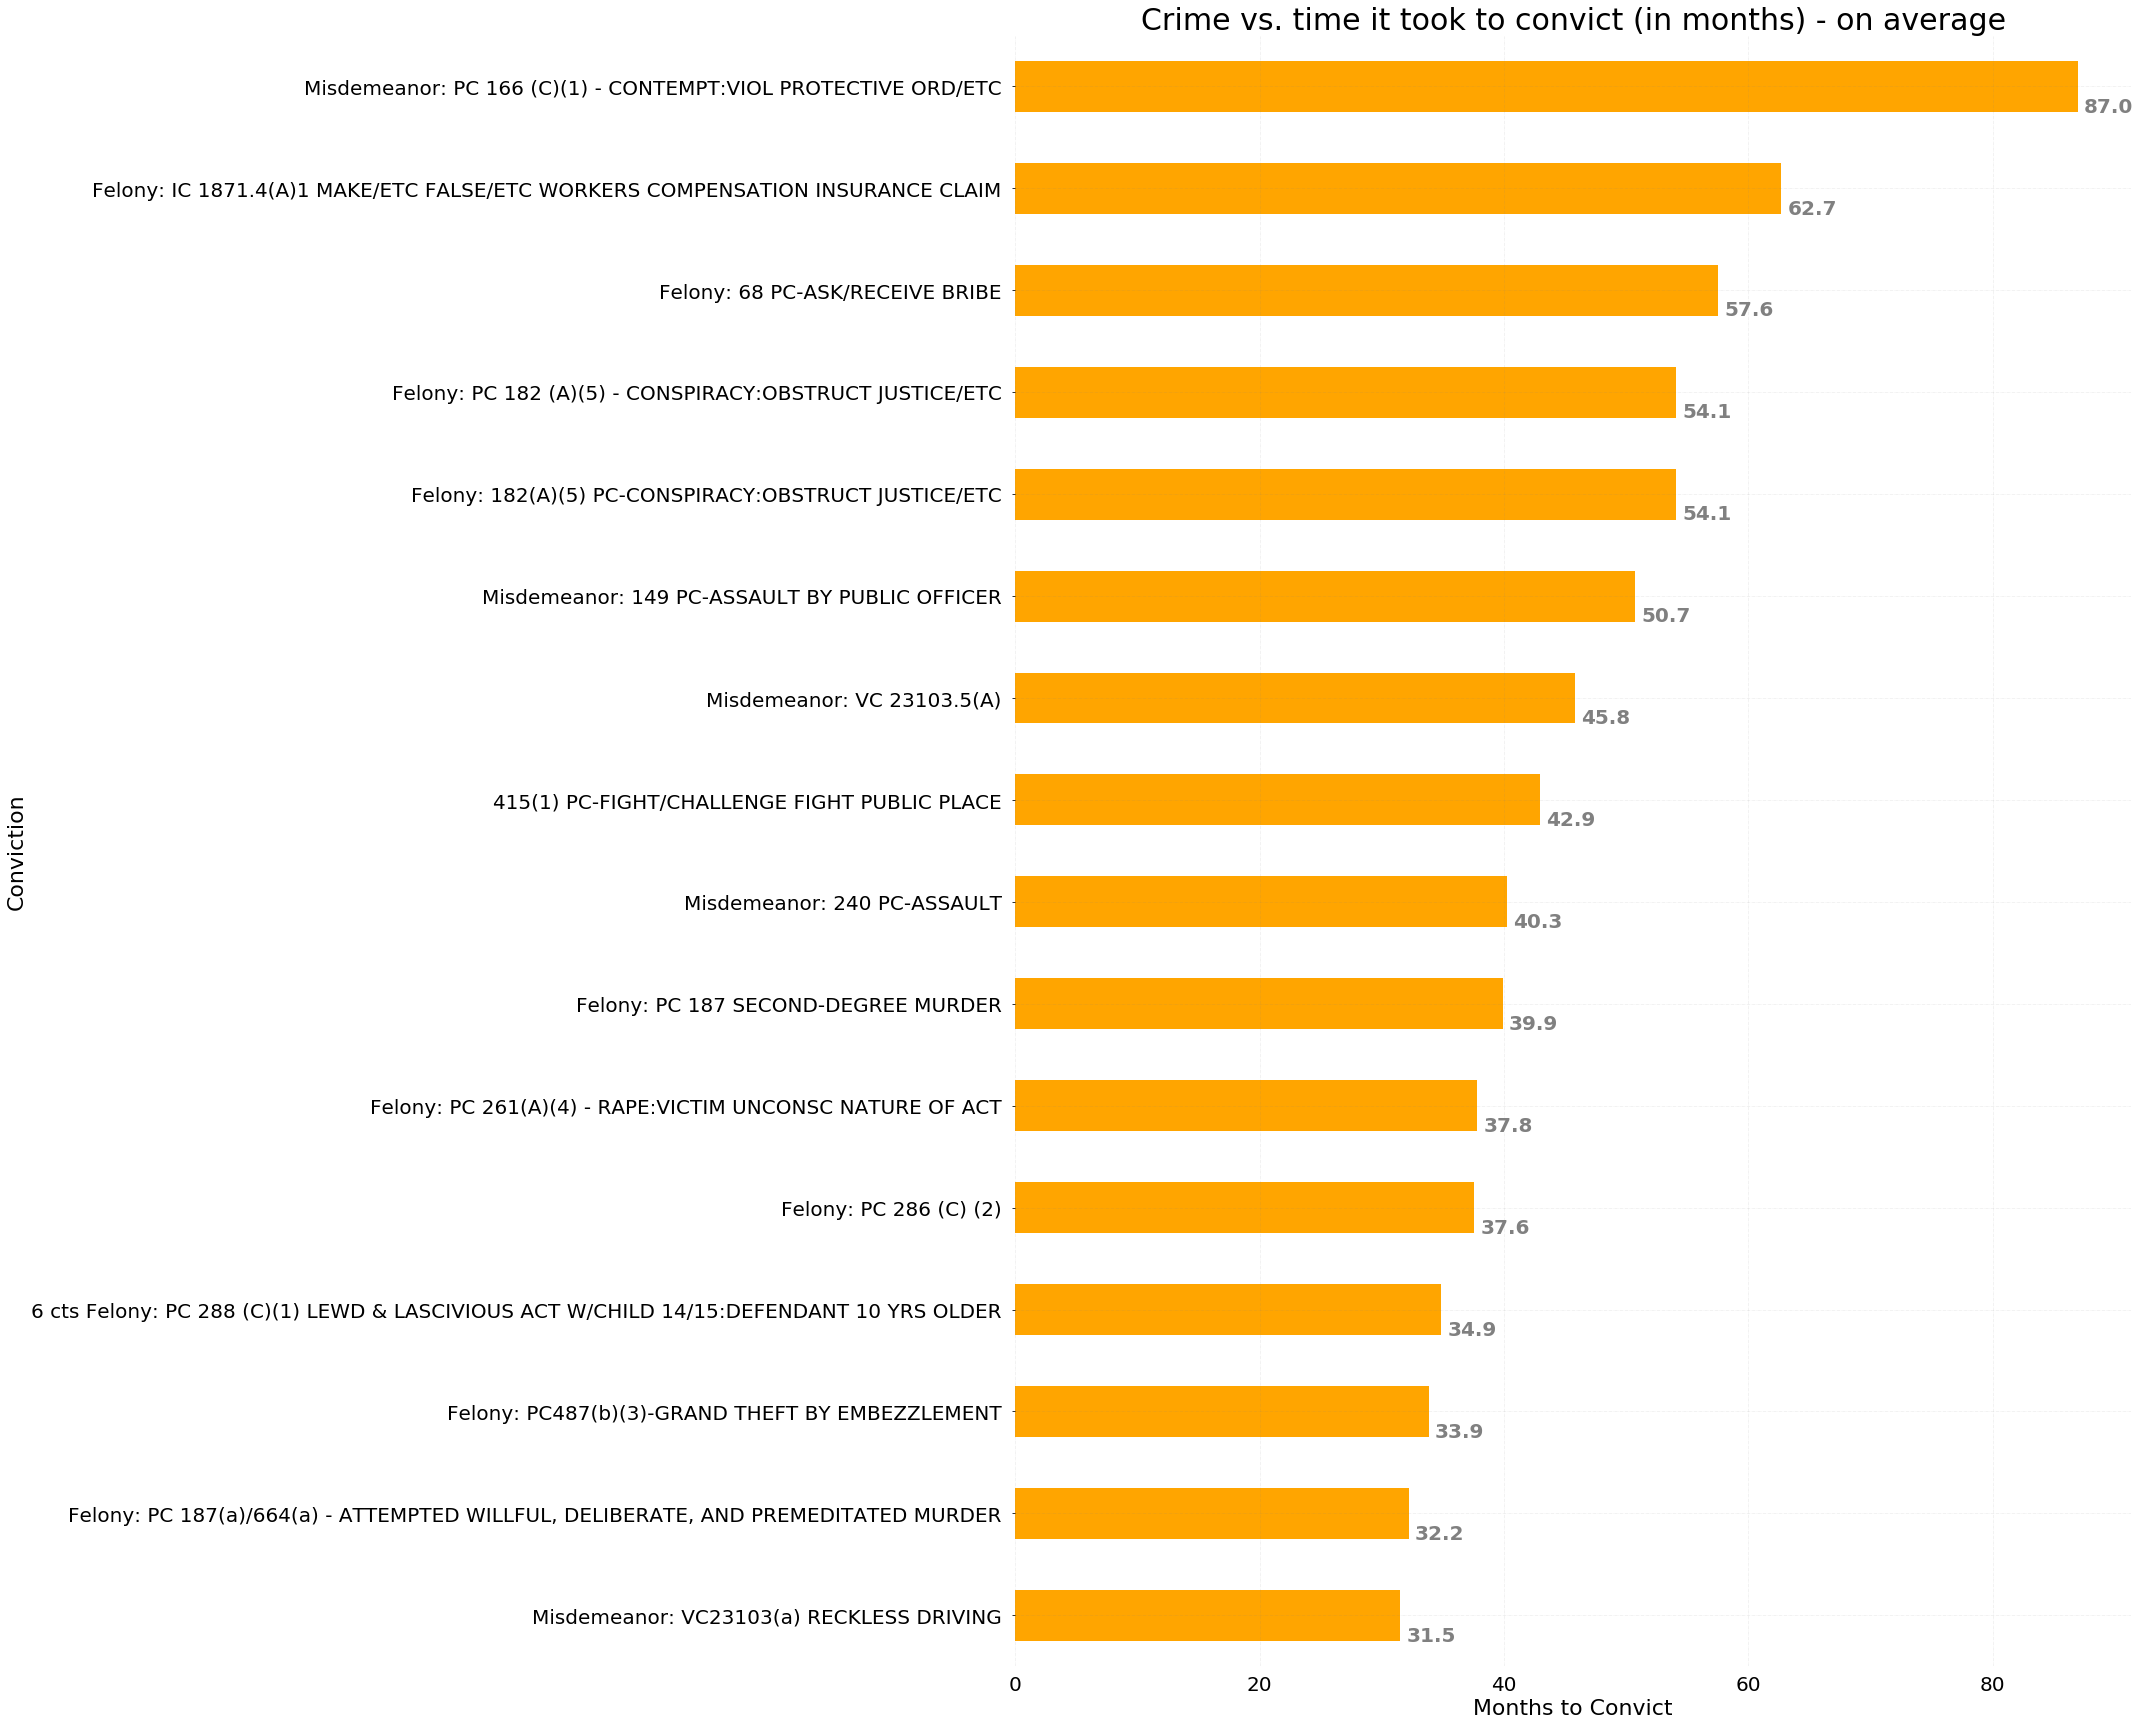

In [100]:
fig, ax = plt.subplots(figsize =(20, 30))

df_time_rank4 = df_time.groupby('conviction1')['months_to_convict'].mean()
df_time_rank4[df_time_rank3 > 30].sort_values().plot.barh(color = 'orange')
ax.set_xlabel('Months to Convict', fontsize = 22)
ax.set_ylabel('Conviction', fontsize = 22)
ax.set_title('Crime vs. time it took to convict (in months) - on average', fontsize = 30)
ax.xaxis.set_ticks_position('none')
ax.xaxis.set_tick_params(pad = 5, labelsize = 20) 
ax.yaxis.set_tick_params(pad = 10, labelsize = 20) 
ax.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.2)
for i in ax.patches: 
    plt.text(i.get_width()+0.5, i.get_y(),  
             str(round((i.get_width()), 1)), 
             fontsize = 20, fontweight ='bold', 
             color ='grey') 

for s in ['top', 'bottom', 'left', 'right']: 
    ax.spines[s].set_visible(False);

In [101]:
df['charge1_desc'].unique()

array(['LEWD & LASCIVIOUS ACT W/CHILD 14/15:DEFENDANT 10 YRS OLDER',
       'LEWD OR LASCIVIOUS ACTS W/CHILD UNDER 14 YEARS',
       'CONSPIRACY TO CHEAT AND DEFRAUD ANOTHER OF PROPERTY',
       'GRAND THEFT:MONEY/LABOR/PROPERTY',
       'SODOMY BY FORCE/VIOLENCE/FEAR', 'ASK/RECEIVE BRIBE',
       'OBTAIN/ETC CONTROLLED SUBSTANCE BY FRAUD',
       'BATTERY AGAINST SPOUSE/ETC',
       'EMBEZZLEMENT OF PROPERTY BY OFFICER/DIRECTOR/ETC',
       'BATTERY WITH SERIOUS BODILY INJURY',
       'CONSPIRACY:OBSTRUCT JUSTICE/ETC',
       'INFLICT CORPORAL INJURY ON SPOUSE/COHABITANT/DATNG RELATNSHP',
       'INSURANCE FRAUD - FALSE CLAIM', "GET CREDIT/ETC OTHER'S ID",
       'VEHICLE MANSLAUGHTER W/O GROSS NEGLIGENCE',
       'EXHIBIT/DRAW FIREARM IN PRESENCE OF MOTOR VEHICLE OCCUPANT',
       'DUI CAUSING INJURY', 'ASSAULT W/DEADLY WEAPON:NOT F/ARM',
       'DUI ALCOHOL', 'GRAND THEFT BY EMPLOYEE OR AGENT',
       'EXHIBIT FIREARM IN PRESENCE OF PEACE OFFICER',
       'BATTERY:SPOUSE/EX SPOUSE/D

In [104]:
df_nums = df['charge1_desc'].value_counts()

In [108]:
df_nums.head()

DUI ALCOHOL                                                     50
INFLICT CORPORAL INJURY ON SPOUSE/COHABITANT/DATNG RELATNSHP    18
ASSAULT BY PUBLIC OFFICER                                       13
GRAND THEFT:MONEY/LABOR/PROPERTY                                10
DUI ALCOHOL:CAUSING BODILY INJURY                                9
Name: charge1_desc, dtype: int64

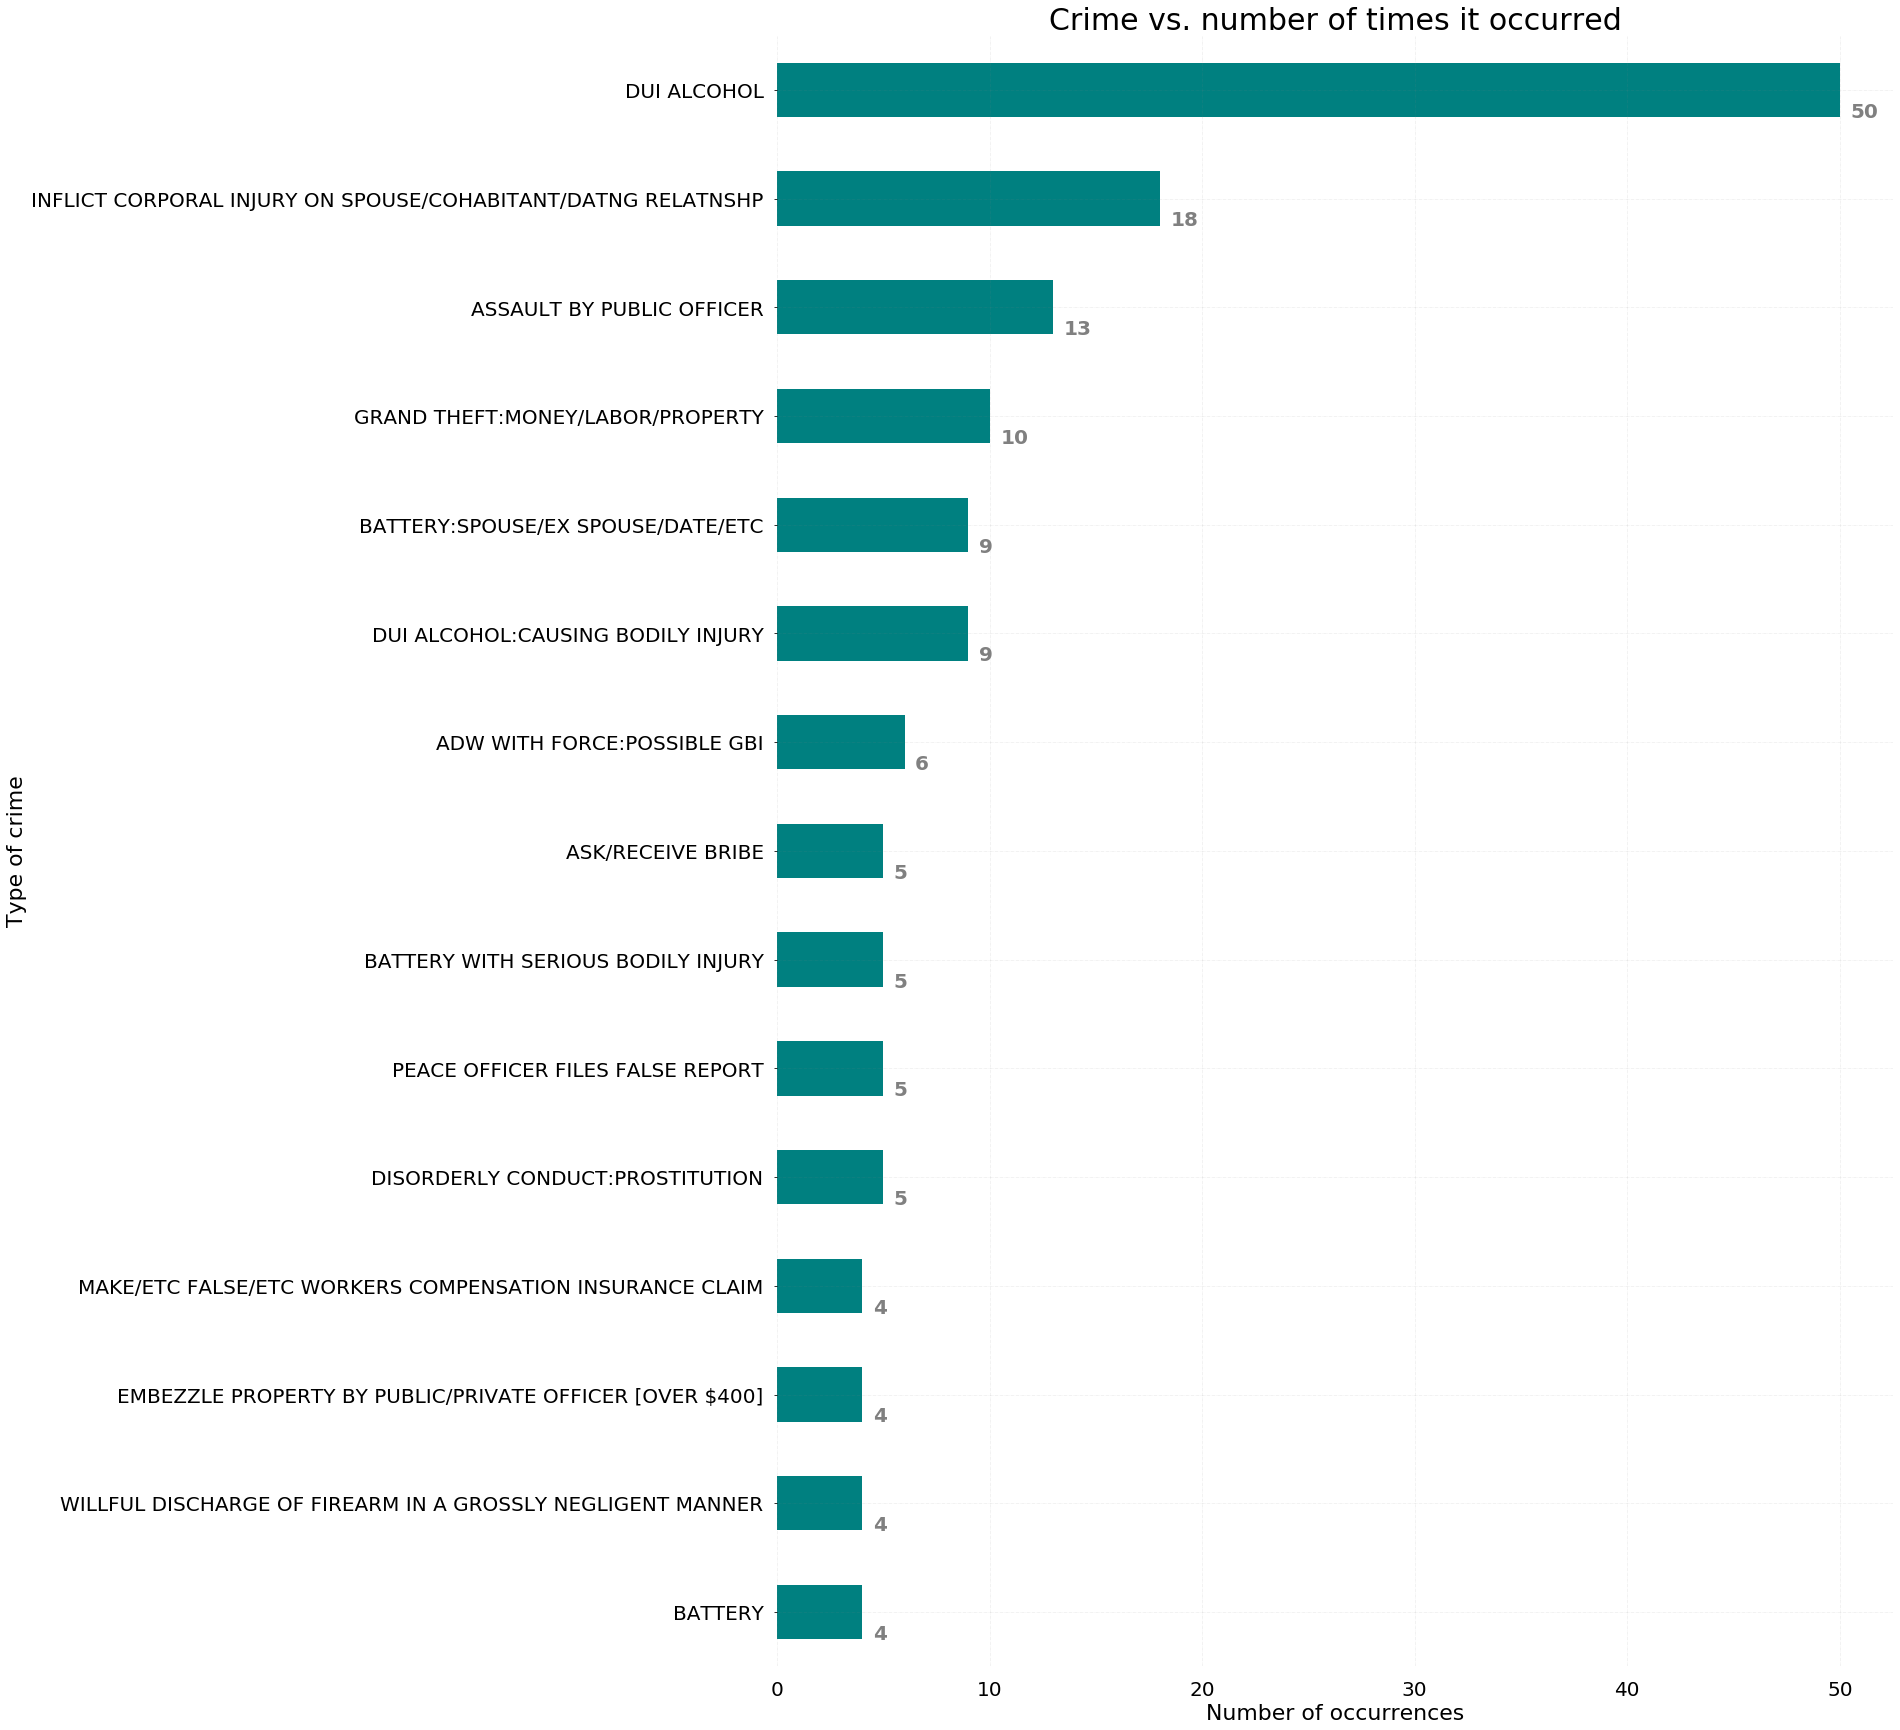

In [111]:
fig, ax = plt.subplots(figsize =(20, 30))


df_nums[df_nums > 3].sort_values().plot.barh(color = 'teal')
ax.set_xlabel('Number of occurrences', fontsize = 22)
ax.set_ylabel('Type of crime', fontsize = 22)
ax.set_title('Crime vs. number of times it occurred', fontsize = 30)
ax.xaxis.set_ticks_position('none')
ax.xaxis.set_tick_params(pad = 10, labelsize = 20) 
ax.yaxis.set_tick_params(pad = 10, labelsize = 20) 
ax.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.2)
for i in ax.patches: 
    plt.text(i.get_width()+0.5, i.get_y(),  
             str(round((i.get_width()), 1)), 
             fontsize = 20, fontweight ='bold', 
             color ='grey') 

for s in ['top', 'bottom', 'left', 'right']: 
    ax.spines[s].set_visible(False);